In [24]:
import pandas as pd

# Read each sheet of the Excel file into separate DataFrames
file_path = "..\\DataCleaning\\resources\\complete_stock_data.csv"
# Read the CSV file into a DataFrame
final_df = pd.read_csv(file_path)
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0.0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0.0
2,1AL,EQY,ONEALL INTERNATIONAL LIMITED ...,ORDINARY,0.910,20170630,2017,NaN,NaN,1.0,0.0
3,1PG,EQY,1-PAGE LIMITED ...,ORDINARY,0.165,20170308,2017,NaN,NaN,1.0,0.0
4,1ST,EQY,1ST GROUP LIMITED ...,ORDINARY,0.026,20170628,2017,NaN,NaN,1.0,0.0


In [25]:
final_df.dropna(subset = ["Sub-Industry"],inplace= True)


In [26]:
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0.0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0.0
5,3DP,EQY,POINTERRA LIMITED ...,ORDINARY,0.025,20170629,2017,Pointerra Limited Ordinary,Software,1.0,0.0
6,3PL,EQY,3P LEARNING LIMITED.. ...,ORDINARY,1.045,20170630,2017,3P Learning Limited. Ordinary,Software,1.0,0.0
8,4DS,EQY,4DS MEMORY LIMITED ...,ORDINARY,0.037,20170630,2017,4DS Memory Limited Ordinary,Computer Hardware,1.0,0.0


In [27]:
final_df["ASX Code"].nunique()

1964

In [28]:
final_df["ASX Code"].count()

11885

In [29]:
# To analyze the data for covid period, we only need to keep the data from 2020 to 2022 which was during covid 
# Then, we will calculate the same analysis for that period.
covid_period = [2020, 2021, 2022]
final_df = final_df[final_df['Year'].isin(covid_period)]
final_df["ASX Code"].nunique()

1847

In [30]:
# Try to apply Splits on the prices of previous years so that we can apply it on the price

# Step 1: Identify Split Events
split_events = final_df[final_df['Splits'] != 1]  # Only select rows where Splits is not equal to 1

# Step 2: Adjust Historical Prices
for _, split_event in split_events.iterrows():
    split_date = split_event['Year']
    split_ratio = split_event['Splits']
    asx_code = split_event['ASX Code']
    
    # Adjust historical prices for the ASX code before the split date
    final_df.loc[(final_df['ASX Code'] == asx_code) & (final_df['Year'] < split_date), 'Last Price($)'] /= split_ratio


In [31]:



# Group data by 'ASX Code' and 'Year', and sort each group by 'Year' before finding the first and last prices
first_last_prices = final_df.groupby(['ASX Code', 'Year']).apply(lambda x: x.sort_values('Year')).reset_index(drop=True).groupby('ASX Code').agg({'Year': ['first', 'last'], 'Last Price($)': ['first', 'last'], 'Dividends': 'sum', 'Sub-Industry': 'last'}).reset_index()

# Rename the columns for clarity
first_last_prices.columns = ['ASX Code', 'First Year', 'Last Year', 'First Price', 'Last Price', 'Total Dividends', 'Sub-Industry']

first_last_prices


,ASX Code,First Year,Last Year,First Price,Last Price,Total Dividends,Sub-Industry
0,14D,2021,2022,0.095,0.075,0.0,Electrical Components & Equipment
1,1AD,2021,2022,0.125,0.055,0.0,Biotechnology & Medical Research
2,1AE,2022,2022,0.205,0.205,0.0,Uranium
3,1AG,2021,2022,0.046,0.017,0.0,Environmental Services & Equipment
4,1MC,2022,2022,0.017,0.017,0.0,Specialty Mining & Metals
...,...,...,...,...,...,...,...
1842,ZLD,2021,2022,0.043,0.970,0.0,Biotechnology & Medical Research
1843,ZMI,2021,2022,0.067,0.037,0.0,Integrated Mining
1844,ZMM,2021,2022,0.014,0.115,0.0,Electrical Components & Equipment
1845,ZNC,2021,2022,0.255,0.280,0.0,Integrated Mining


In [32]:
# Calculate total return (price appreciation + dividends)
first_last_prices['Total Return'] = first_last_prices['Last Price'] - first_last_prices['First Price'] + first_last_prices['Total Dividends']

# Normalize total return
first_last_prices['Normalized Total Return'] = first_last_prices['Total Return'] / first_last_prices['First Price']

# Sort ASX codes based on normalized total return
sorted_data = first_last_prices.sort_values(by='Normalized Total Return', ascending=False)

# Create report
top_gainers_report = sorted_data[['ASX Code', 'Total Return', 'Normalized Total Return', 'First Price', 'Last Price', 'Sub-Industry']]

# Display or export the report as needed
top_gainers_report.head(10)  # Display top 10 gainers


,ASX Code,Total Return,Normalized Total Return,First Price,Last Price,Sub-Industry
1494,SBR,11.8800,2970.000000,0.004,0.004,Specialty Mining & Metals
1137,MTB,9.2980,1328.285714,0.007,0.005,Integrated Mining
232,AYI,1.0400,1040.000000,0.001,0.001,Investment Management & Fund Operators
402,CHK,10.7010,668.812500,0.016,0.007,Precious Metals & Minerals
471,CTO,6.9540,632.181818,0.011,0.005,Gold
517,DDT,3.7610,626.833333,0.006,0.007,Software
934,KEY,1.5790,526.333333,0.003,0.002,Oil & Gas Exploration and Production
141,AOA,2.5134,502.680000,0.005,0.006,Integrated Mining
230,AXP,1.9900,497.500000,0.004,0.004,Oil & Gas Exploration and Production
988,LIN,9.0190,429.476190,0.021,0.120,Aluminum


In [33]:
# Display or export the report as needed
top_gainers_report[['ASX Code','Normalized Total Return','Sub-Industry']].head(10)  # Display top 10 gainers

,ASX Code,Normalized Total Return,Sub-Industry
1494,SBR,2970.000000,Specialty Mining & Metals
1137,MTB,1328.285714,Integrated Mining
232,AYI,1040.000000,Investment Management & Fund Operators
402,CHK,668.812500,Precious Metals & Minerals
471,CTO,632.181818,Gold
517,DDT,626.833333,Software
934,KEY,526.333333,Oil & Gas Exploration and Production
141,AOA,502.680000,Integrated Mining
230,AXP,497.500000,Oil & Gas Exploration and Production
988,LIN,429.476190,Aluminum


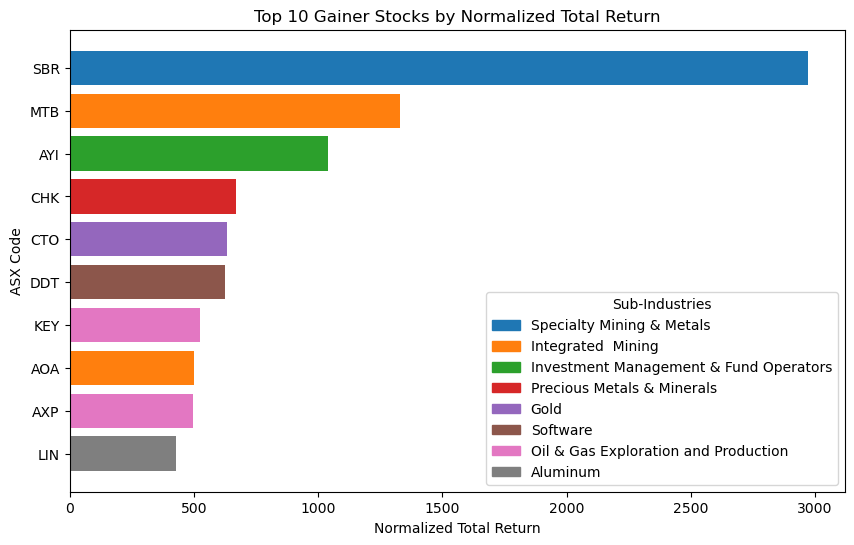

In [41]:
import matplotlib.pyplot as plt

# Data
top_gainers = top_gainers_report[['ASX Code', 'Normalized Total Return', 'Sub-Industry']].head(10)
asx_codes = top_gainers['ASX Code']
normalized_total_returns = top_gainers['Normalized Total Return']
sub_industries = top_gainers['Sub-Industry']

# Assigning unique colors to each sub-industry
unique_sub_industries = sub_industries.unique()
colors = plt.cm.tab10.colors[:len(unique_sub_industries)]  # Using tab10 colormap for colors

# Create a dictionary to map each sub-industry to a color and track if it's already in the legend
color_map = {}
handles = []
for i, (sub_industry, color) in enumerate(zip(unique_sub_industries, colors)):
    if sub_industry not in color_map:
        color_map[sub_industry] = color
        handles.append((sub_industry, color))

# Create a bar plot with consistent colors for each sub-industry
plt.figure(figsize=(10, 6))
legend_handles = []
for asx_code, normalized_total_return, sub_industry in zip(asx_codes, normalized_total_returns, sub_industries):
    if sub_industry in color_map:
        plt.barh(asx_code, normalized_total_return, color=color_map[sub_industry])
        # Add the sub-industry to the legend if it's the first occurrence
        if sub_industry not in legend_handles:
            legend_handles.append(sub_industry)

plt.xlabel('Normalized Total Return')
plt.ylabel('ASX Code')
plt.title('Top 10 Gainer Stocks by Normalized Total Return')

# Create custom legend labels
legend_labels = [plt.Rectangle((0,0),1,1, color=color_map[sub_industry]) for sub_industry in legend_handles]
plt.legend(handles=legend_labels, labels=legend_handles, loc='lower right', title='Sub-Industries')
plt.gca().invert_yaxis()  # Invert y-axis to display highest return at the top
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_25608\2728516972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb_data['Adjusted Price'] = mtb_data['Last Price($)']


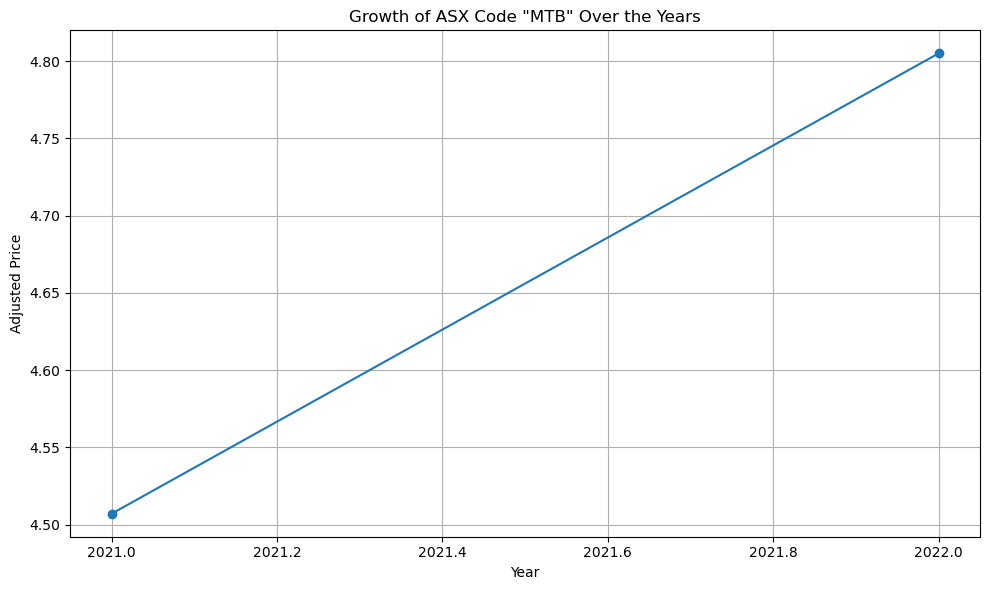

In [47]:
import matplotlib.pyplot as plt

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'MTB']

# Calculate adjusted price for MTB
mtb_data['Adjusted Price'] = mtb_data['Last Price($)']
for _, row in mtb_data.iterrows():
    splits = row['Splits']
    dividends = row['Dividends']
    if splits != 1:
        mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] /= splits
    mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] += dividends

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mtb_data['Year'], mtb_data['Adjusted Price'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Adjusted Price')
plt.title('Growth of ASX Code "MTB" Over the Years')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [20]:
# Display or export the report as needed
top_gainers_report.tail(10)  # Display top 10 gainers


,ASX Code,Total Return,Normalized Total Return,First Price,Last Price,Sub-Industry
539,DOU,-0.0790,-0.849462,0.0930,0.014,Financial Technology (Fintech)
969,LAW,-1.0200,-0.857143,1.1900,0.170,Corporate Financial Services
548,DTC,-0.7200,-0.867470,0.8300,0.110,Software
1234,NZK,-1.2000,-0.869565,1.3800,0.180,Fishing & Farming
266,BEX,-0.2025,-0.870968,0.2325,0.030,Online Services
1352,PPK,-13.9100,-0.872100,15.9500,2.040,Commodity Chemicals
872,IMR,-1.7500,-0.877193,1.9950,0.245,Advanced Medical Equipment & Technology
753,GOLD,-193.3100,-0.883784,218.7300,24.500,Investment Management & Fund Operators
80,AHI,-1.1950,-0.908745,1.3150,0.120,Software
282,BKG,-2.4150,-0.914773,2.6400,0.225,Department Stores


In [21]:
top_sub_industries = top_gainers_report.groupby('Sub-Industry')['Normalized Total Return'].mean()
top_sub_industries = top_sub_industries.sort_values(ascending=False)

In [22]:
top_sub_industries

Sub-Industry
Aluminum                             64.019898
Communications & Networking          54.919145
Precious Metals & Minerals           29.766593
Financial Technology (Fintech)       29.390031
Specialty Mining & Metals            26.458112
                                       ...    
Personal Products                    -0.532354
Household Products                   -0.542466
Oil & Gas Transportation Services    -0.660000
Independent Power Producers          -0.675000
Shipbuilding                         -0.714286
Name: Normalized Total Return, Length: 127, dtype: float64